# Indicators of Heavy Traffic on I-94

In this mini-project, we are going to analyze a dataset that covers the traffic activity of the [I-94 Interstate Highway.](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume)

The goal of this analysis is to determine a few indicators of heavy traffic on the I-94. These indicators could be weather type, time of the day, time of the week, etc.

Dataset dictionary:

- `holiday` - US National holidays plus regional holiday, Minnesota State Fair
- `temp` - Average temp in kelvin
- `rain_1h` - Amount in mm of rain that occurred in the hour
- `snow_1h` - Amount in mm of snow that occurred in the hour
- `clouds_all` - Percentage of cloud cover
- `weather_main` - Short textual description of the current weather
- `weather_description` - Longer textual description of the current weather
- `date_time` - Hour of the data collected in local CST time
- `traffic_volume` - Hourly I-94 ATR 301 reported westbound traffic volume

### The I-94 Traffic Dataset

In [1]:
import pandas as pd

traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


Observations:
- Dataset has 48,204 rows and 9 columns.
- Each of those rows decribe the weather data and traffic volume for that time instance.
- We have a `date_time` column, recodring the traffic data at that time - Collected hourly. 
- `date_time` starts from 09:00 on 2012-10-02, and ends on 2018-09-30 at 23:00.

As per the [dataset documentation](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume), the station located approximatley midway between Minneapolis and Saint Paul recorded the traffic data. In addition, the station only recorded westbound traffic (cars moving from east-to-west), not both ways. Meaning the results of this analysis will be aboutr the westbound traffic.

### Analyzing Traffic Volume

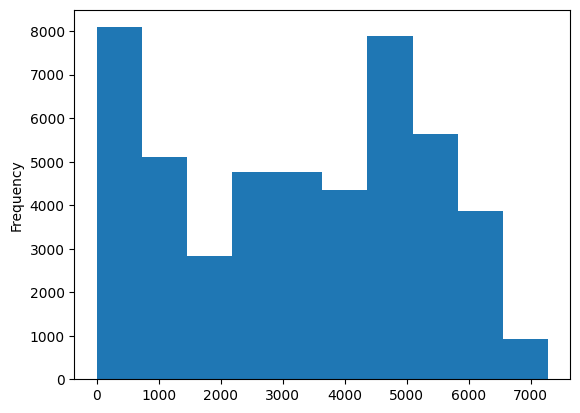

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# Traffic volume histogram
traffic['traffic_volume'].plot.hist()
plt.show()

In [5]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The `traffic_volume` columns shows us that the volume of the traffic seen at each our which averages out to around 3,259 cars. With the most amound of cars being seen at a given time being 7,280. 

25% of the time only 1,193 cars were seen each hour. Since this dataset records 24 hours - This is likely data representing the the night, or when the roads are blocked for whatever reason. That count 4x's to 4,933 about 75% of the time, likely during the day.

Let's see if daytime and nighttime has influnce over the traffic volume.

## Traffic Volume: Days vs. Night

We'll start by dviding the dataset into 2 parts:
- Daytime data: hours from 7:00 AM to 7:00 PM (12 hours)
- Nighttime data: hours from 7:00 PM to 7:00 AM (12 hours)

While not a perfect criterion to distguish between night and day, it'll serve as a good starting point.


In [6]:
# Convert `date_time` column into a datetime object
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [7]:
# Daytime data
day = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
print(f'Daytime data shape: {day.shape}')

# Nightime data
night = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]
print(f'Nighttime data shape: {night.shape}')

Daytime data shape: (23877, 9)
Nighttime data shape: (24327, 9)


Despite splitting the time evenly, we see that the `day` data has around 1,000 less rows than the `night` data. This is due to hours missing from the `date_time` column.

### Traffic Volume: Day vs. Night (II)

Now that we've divided the dataset into 2 parts, let's compare the traffic volume at `night` and during the `day`.

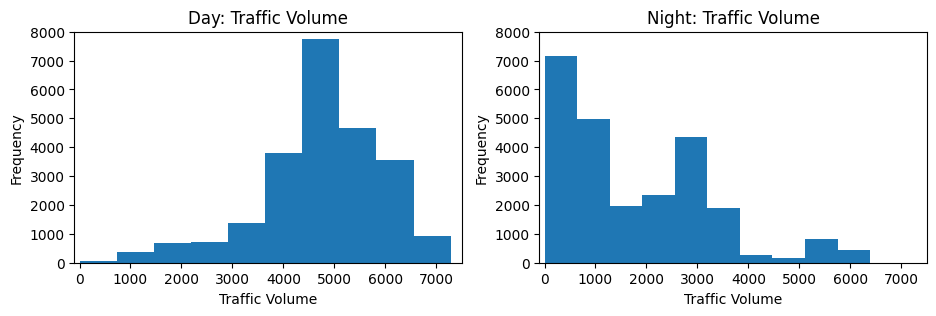

In [8]:
plt.figure(figsize=(11, 3))

# Day: traffic volume histogram
plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.title('Day: Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim([-100, 7500])
plt.ylim([0, 8000])

# Night: traffic volume histogram
plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.title('Night: Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim([-100, 7500])
plt.ylim([0, 8000])

plt.show()

In [9]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [10]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

`Day`:

The histogram graph for the daytime data shows that the majority of values are focused around the 4,000 - 6,000 traffic value score (number of cars seen). This aligns with the fact that the mean (average) traffic volvume is 4,762 cars; with 5,559 cars or less being seen 75% of the time during the day. 
The histogram also shows that the data is left-skewed, validating that higher values are typically seen throughout the day.

`Night`:

The nighttime histogram is right-skewed - typical number of cars seen are on the lower-end. This is validated by the nighttime traffic volume average being only 1,785 cars, with a little under 3,000 cars being seen 75% of the time. Meaning, around 2,977 less cars being seen on average compared to during the day.

Although we see a max traffic volume of 6,386 in the night, the traffic on average is very light in comparrison to the day. Since our goal is to find indicators of heavy traffic, we'll focus on the daytime data

## Time Indicators 

One of the possible indicators of heavy traffic is time. There might be more people on the road at a certain month, on a certain day, or at a certain time of day.

In [11]:
# Create a new column `month` that stores only the month from the `date_time` column
day['month'] = day['date_time'].dt.month

# Group the `month` column to calculate the mean
by_month = day.groupby('month').mean(numeric_only=True)

# Check frequency of months
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

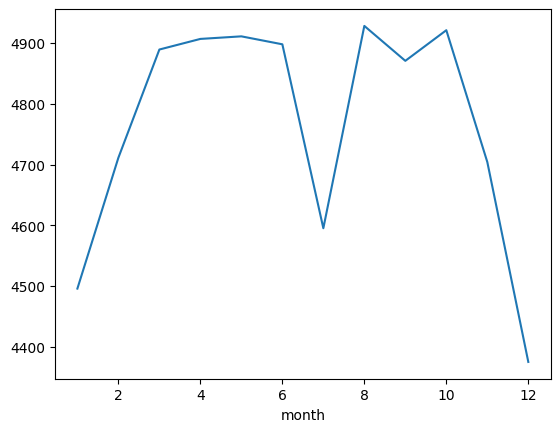

In [12]:
by_month['traffic_volume'].plot.line()
plt.show()

The traffic seems to stay relativley high during warmer months; March - September, untill the months get colder - where we see a rapid decrease in traffic volume. This trend begin around late October - Feburary, where we see a rapid increase in volume.
The cause of this could be the weather conditions having an affect on the roads, such as heavy rains, snow/ ice, hail etc.

However, we see an odd exception to this pattern around the month of July, where we see a sharp descrease. Let's see what exactly is happening in July & if this happened in the other years.

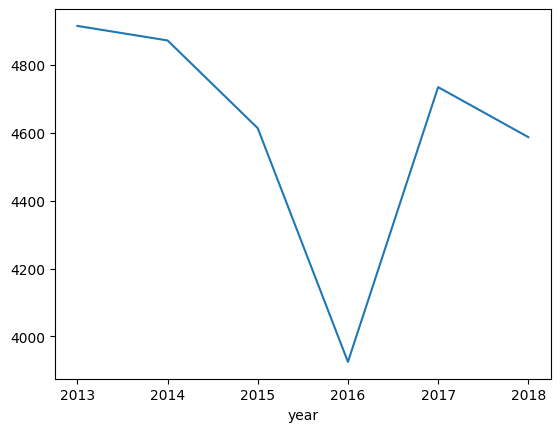

In [13]:
# Create new `year` column
day['year'] = day['date_time'].dt.year
# Find rows that are recorded in the month of July (7)
july = day[day['month'] == 7]
# Group & find mean of all rows recorded in July
july = july.groupby('year').mean(numeric_only=True)
july['traffic_volume'].plot.line()
plt.show()

We can see that during the month of July, all other years besides 2016 remained in the typical average traffic volume count of around 4,700. This could be caused by some sort of accident or road-word being conduceted on that day. We see form [this article](https://www.clickondetroit.com/traffic/2016/07/15/weekend-road-closures-may-affect-drivers-around-i-696-m-5/), that road-work could be a cause of behaviour shown in the graph.

### Time Indicators (II)

Now lets look build a line plot for the average traffic volume for the days of the week.

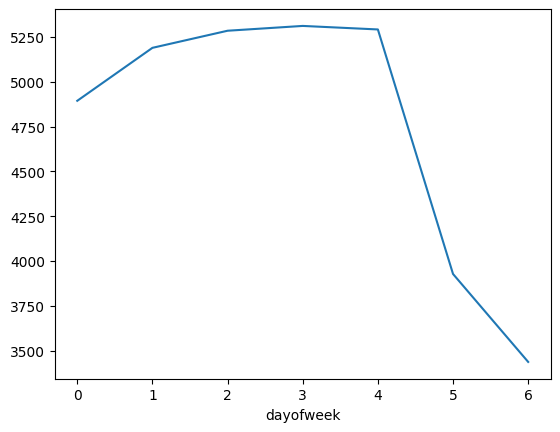

In [14]:
# Average day of the week traffic volume
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean(numeric_only=True)
by_dayofweek['traffic_volume'].plot.line()
plt.show()

Following the typical behaviour of most roads, the I-94 highway is the most busy during the weekdays (Monday - Friday), seeing over 5,000 cars daily. While significantly less busy on weekends - seeing volume descrease to under 3,500 cars; around a 1,500 car decrease.   

### Time Indicators (III)

We'll now look at the traffic volumes behviour throuout the day. Since during the weekends we see a lower volume of traffic, we will seperate them from the weekdays - our goal is to determine what indicators drive heavy traffic. However, we will look at the weekend averages seperately.

In [15]:
# Seperate and make two datasets: weekends & weekdays
day['hour'] = day['date_time'].dt.hour
# Weekday - 4 == Friday
weekday = day.copy()[day['dayofweek'] <= 4]
# Weekend - 5 == Saturday
weekend = day.copy()[day['dayofweek'] >= 5]

# Group by hours of the day
by_weekday = weekday.groupby('hour').mean(numeric_only=True)
by_weekend = weekend.groupby('hour').mean(numeric_only=True)

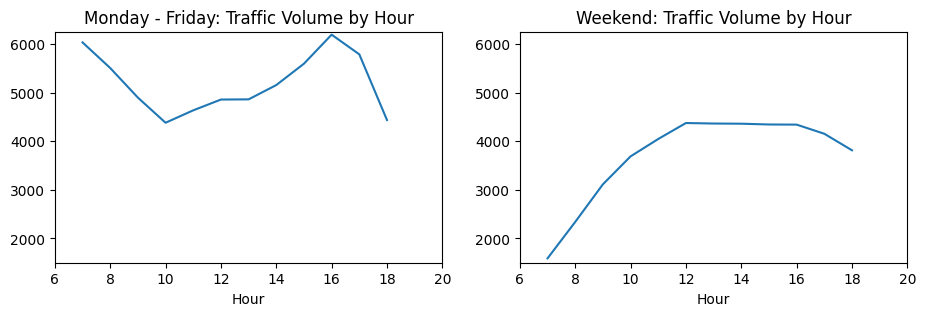

In [16]:
plt.figure(figsize=(11, 3))

# Weekday line plot
plt.subplot(1, 2, 1)
by_weekday['traffic_volume'].plot.line()
plt.title('Monday - Friday: Traffic Volume by Hour')
plt.xlabel('Hour')
plt.xlim([6, 20])
plt.ylim([1500, 6250])

# Weekend line plot
plt.subplot(1, 2, 2)
by_weekend['traffic_volume'].plot.line()
plt.title('Weekend: Traffic Volume by Hour')
plt.xlabel('Hour')
plt.xlim([6, 20])
plt.ylim([1500, 6250])

plt.show()

We can see that generally, at all times of the day, business days tend to be more busy than weekends. On Business days (Monday - Friday), we seen that between hour 7 to 8, and 16 to 17 have the most volume of traffic, with over 6,000 cars being seen - this could be rush-hour, people going to work, and then heading back home from work.
While on weekends it only really ever gets busy during hours 12 - 16; around mid-day, staying under 5,000 cars being seen. 

Summary:
- From March - September, the roads are the most busy; dropping in the colder months of October - Feburary.
- In July of 2016, construction was being done, which reduced the traffic volume (despite July being typically a busy month).
- Business days (Monday - Friday), are far more traffic heavy when comapred to weekends.
- Hours 7 - 9 and 16 - 17, are the most busy times on business days (rush hours). Where hours 12 - 16 are the most for weekends. 

## Weather Indicators

So far, we've focused on finding time indicators for heavy traffic. Another possible indicator is weather. The dataset provides quite a few rows that provide information about the weather of a recorded time: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

Let's start by looking at some of their correlation with `traffic_volume`.

In [17]:
day.corr(numeric_only=True)['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

The weather indicator with the highest correlation to the `traffic_volume` column is `temp` wiht a correlation score of +0.13. The others such as `rain_1h` and `snow_1h` although positive, dont show strong correlations with traffic volume. 

Let's visualize the correlation between `traffic_volume` and `temp`. 

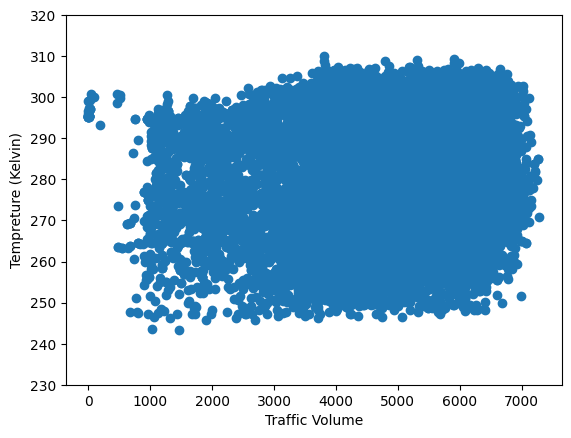

In [18]:
plt.scatter(day['traffic_volume'], day['temp'])
plt.xlabel('Traffic Volume')
plt.ylabel('Tempreture (Kelvin)')
plt.ylim([230, 320])
plt.show()

The `temp` column dosent give us much notable information on wether its is an indicator for heavy traffic or not.

We'll now look at `weather_main` and `weather_description`.

## Weather Types 

Let's look at average results of `weather_main` and `weather_description`.

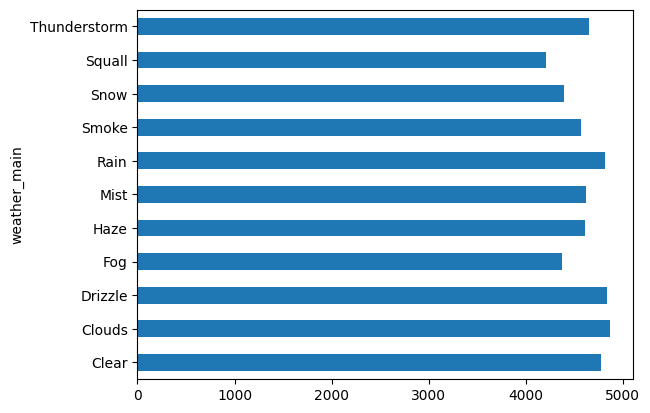

In [19]:
# Grouped & averaged `weather_main`
by_weather_main = day.groupby('weather_main').mean(numeric_only=True)
by_weather_main['traffic_volume'].plot.barh()
plt.show()

There are no weather types that seem to exceed 5,000 cars. Additionally, it is hard to tell which weather types that can be considered a heacy traffic indicator as they are all roughly even. The only ones that stick out are: Thunderstorm, Smoke, Drizzle and Clouds. However, drizzle and clouds are not typically indicators for traffic - especially heavy traffic.  

Let's look at the `weather_description` column, which provides a more descriptive representation of the weather at the recorded time. 

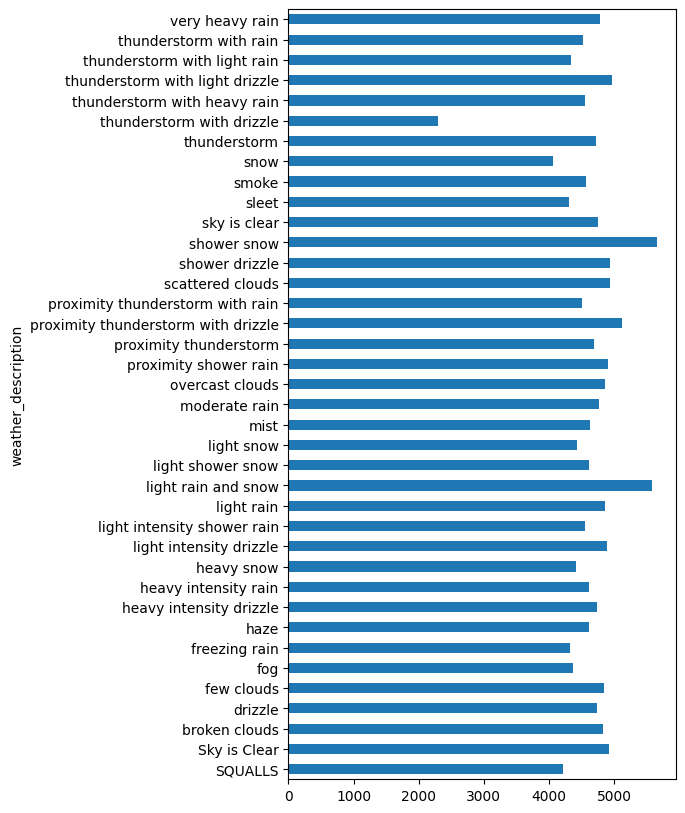

In [20]:
# Grouped & averaged `weather_description`
by_weather_desc = day.groupby('weather_description').mean(numeric_only=True)
by_weather_desc['traffic_volume'].plot.barh(figsize=(5, 10))
plt.show()

We can see that:

- `light rain and snow`
- `shower snow`
- `proximity thunderstom with drizzle` 

All surpass the traffic volume of 5,000 - with `light rain and snow` & `shower snow` being the two standouts. 


Meaning we can make the assumption that snow is one of the main indicators that cause heavy traffic. However, since its not exactly clear as to why the volume increases under those weather types - we can also make the assumption people would rather drive under those poor weather types, rather than walk, bike, etc.

## Conclusion

In this project I conducted an analysis is to determine a few indicators of heavy traffic on the I-94. Finding two main types of indicators:

Time Indicators:
- From March - September, the roads are the most busy; dropping in the colder months of October - Feburary.
- In July of 2016, construction was being done, which reduced the traffic volume (despite July being typically a busy month).
- Business days (Monday - Friday), are far more traffic heavy when comapred to weekends.
- Hours 7 - 9 and 16 - 17, are the most busy times on business days (rush hours). Where hours 12 - 16 are the most for weekends. 

Weather Indicators:
- `light rain and snow`
- `shower snow`
- `proximity thunderstom with drizzle` 

All surpass the traffic volume of 5,000.

### Next steps

- Use the nighttime data to look for heavy traffic indicators.
- Find more time and weather indicators.